# PIMA Indian Diabetes Dataset 

### About Dataset

#### Context
###### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
##### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Problem Statement:
Build a model to accurately predict whether the patients in the dataset have diabetes or not. The datasets consists of several medical predictor variables and one target variable, Outcome. 

##### Pregnancies: Number of times pregnant
##### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
##### BloodPressure: Diastolic blood pressure (mm Hg)
##### SkinThickness: Triceps skin fold thickness (mm)
##### Insulin: 2-Hour serum insulin (mu U/ml)
##### BMI: Body mass index (weight in kg/(height in m)^2)
##### DiabetesPedigreeFunction: Diabetes pedigree function
##### Age: Age (years)
##### Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Contribution towards the project:

#### The objective is to find a model which will be able to predict whether a person is likely to have diabetes or not given their medical records. Various classification models will be tested against this dataset to find the one which will be best suited for this problem, so that given the symptoms we can predict the outcome of the patient before hand so that precautionary measures can be taken.

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Importing Data

In [2]:
df = pd.read_csv("diabetes.csv")

#### Understanding the Dataset

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Finding missing values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

###### From the describe function we can have a understanding that the null or the missing values of this dataset has already been altered with zero

#### Finding Correlation

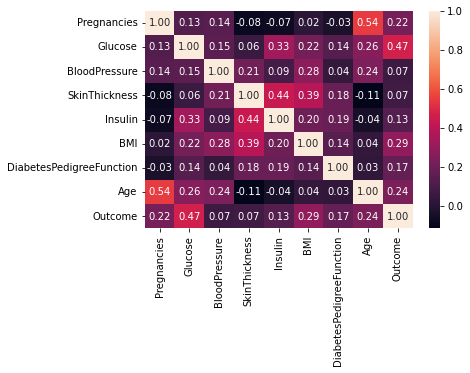

In [7]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

#### Exploratory Data Analysis

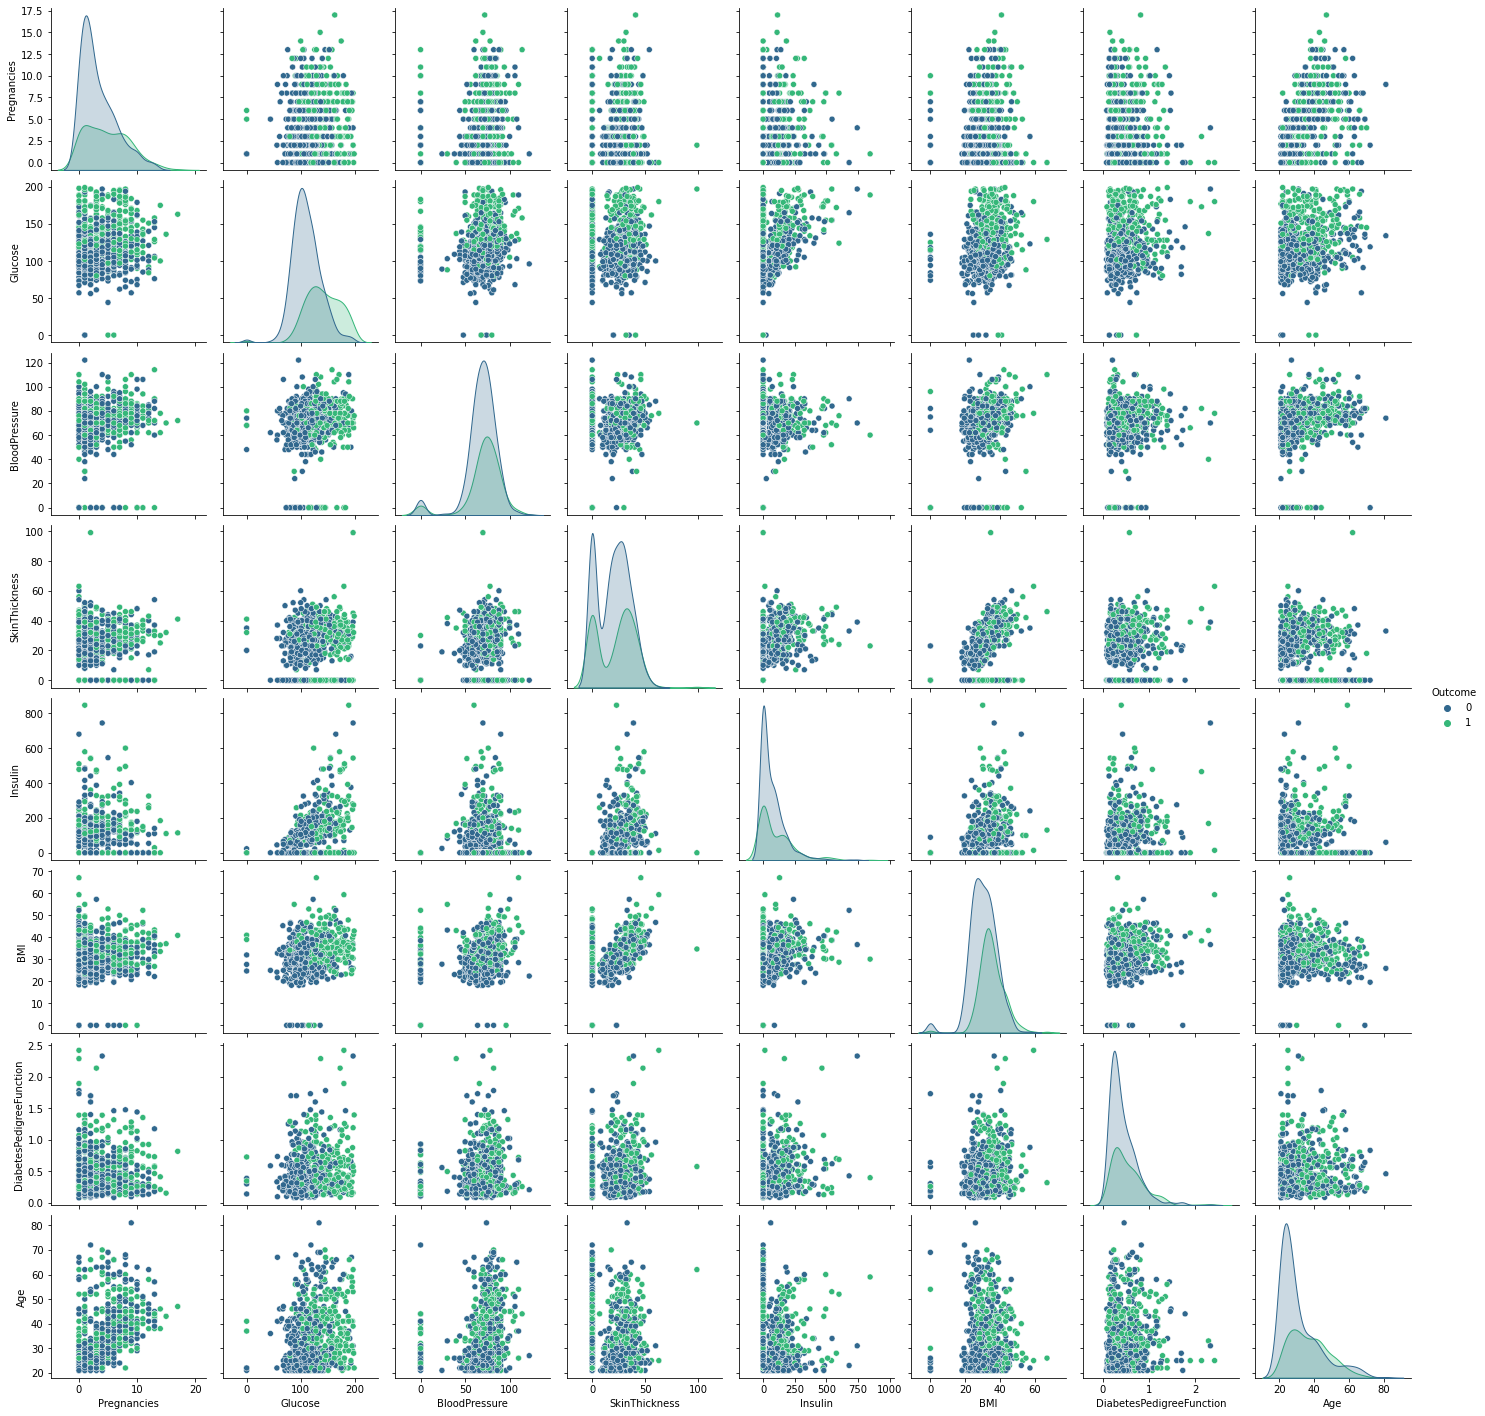

In [8]:
sns.pairplot(df, hue = 'Outcome', palette= 'viridis')

Text(0.5, 1.0, 'Diabetes Patient')

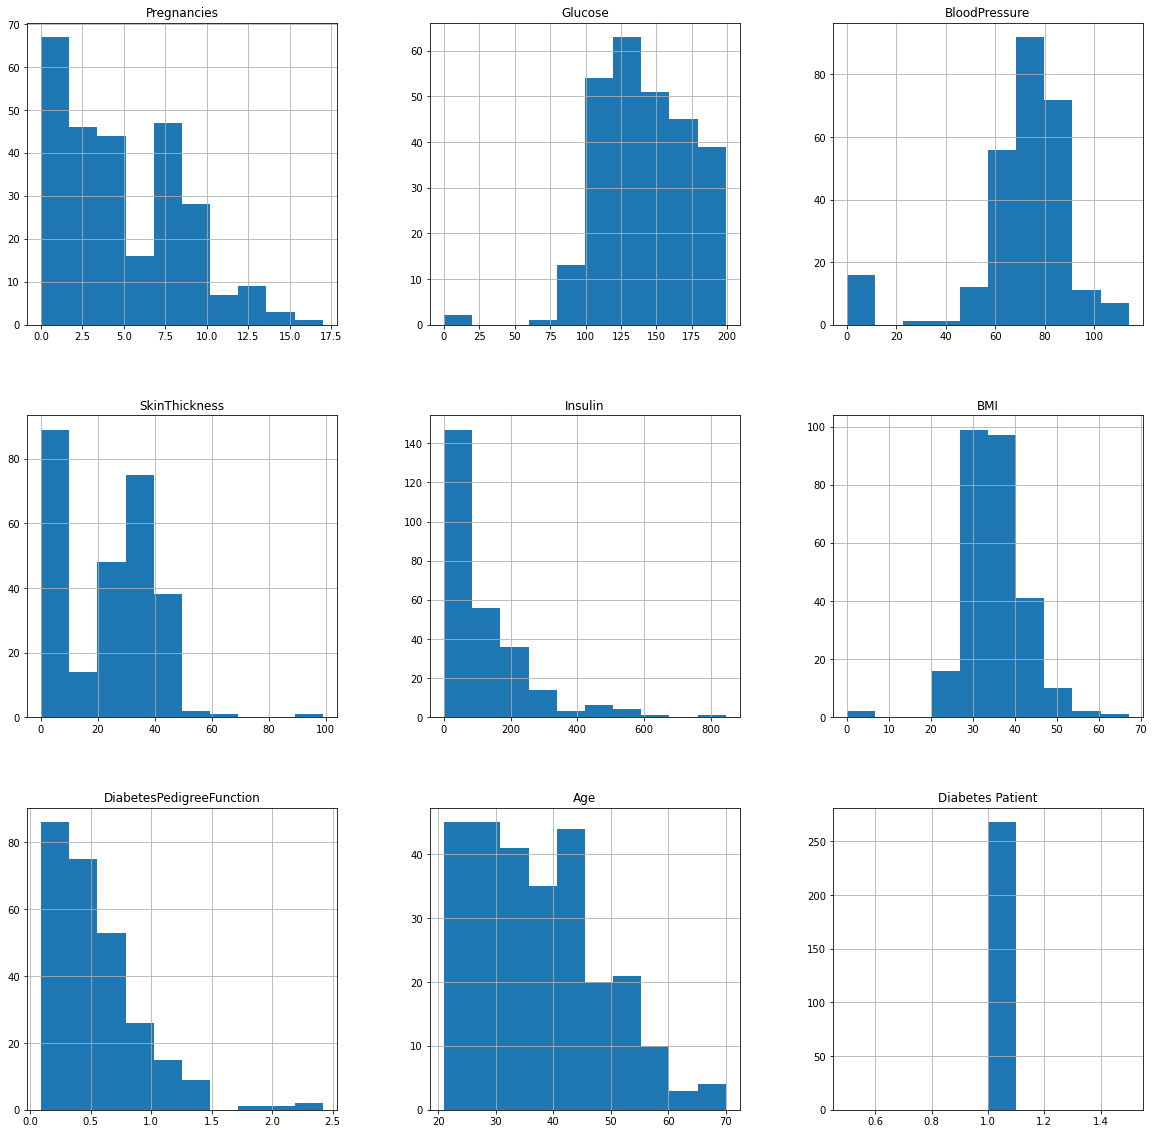

In [9]:
p = df[df['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

Text(0.5, 1.0, 'Diabetes Patient')

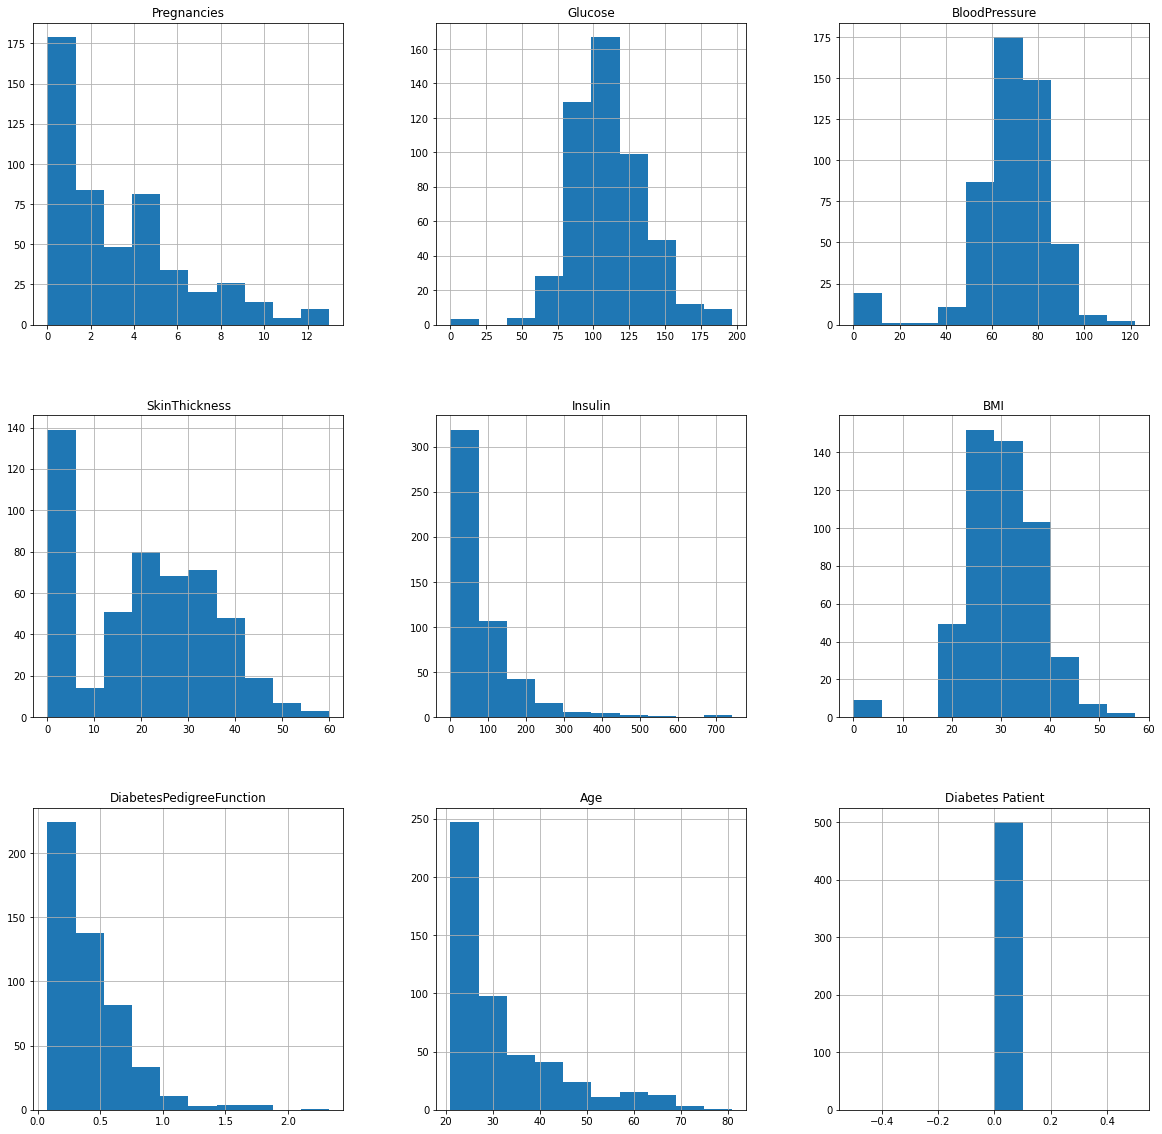

In [10]:
p = df[df['Outcome']==0].hist(figsize = (20,20))
plt.title('Diabetes Patient')

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

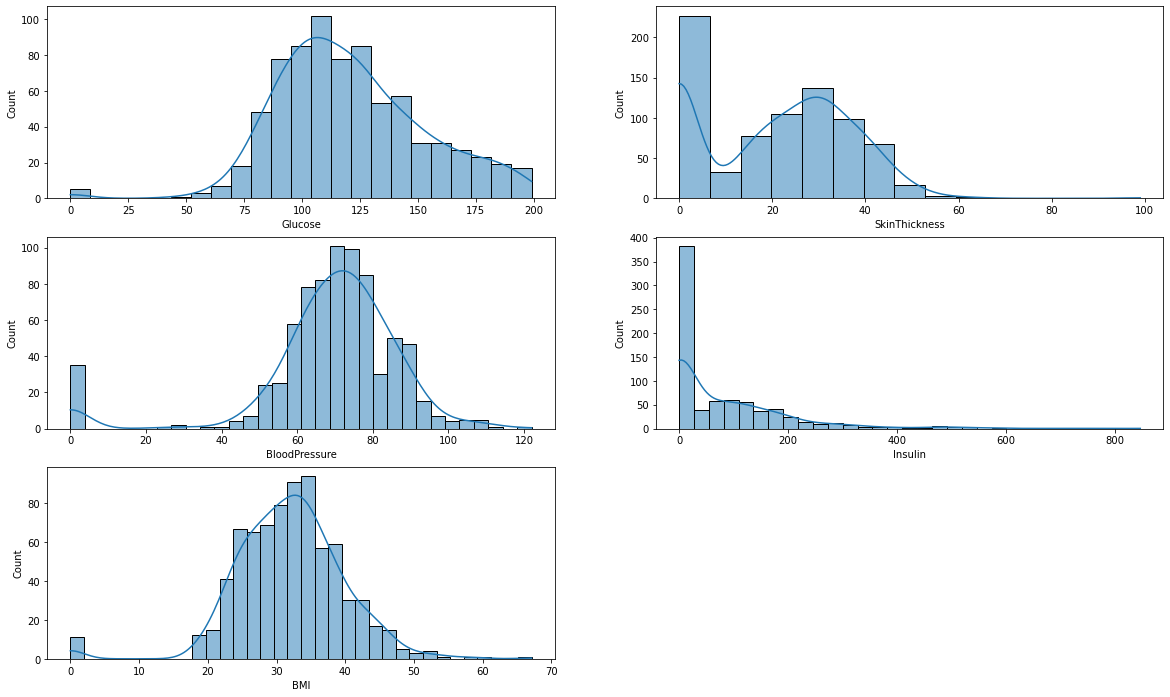

In [12]:
plt.figure(figsize=[20,12])
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
sns.histplot(data= df, x='Glucose', kde=True, ax=ax1)
sns.histplot(data= df, x='SkinThickness', kde=True, ax=ax2)
sns.histplot(data= df, x='BloodPressure', kde=True, ax=ax3)
sns.histplot(data= df, x='Insulin', kde=True, ax=ax4)
sns.histplot(data= df, x='BMI', kde=True, ax=ax5)
plt.show()

##### From the histogram plot we can see that these five features has some 0 value, which is not possible. Skin thickness & insulin has the highest 0 values in the dataset.

### Finding the number of values as 0.

In [13]:
num_missing = (df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()
print(num_missing)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


### Replacing 0 with NaN value for imputation.

In [14]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, nan)
# count the number of nan values in each column
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [15]:
#percentage of missing value

df.isna().sum() * 100 / df.shape[0]

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

#### We can see Insulin has 48.7% of missing value and hence should be dropped.

In [16]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [17]:
df[['Insulin']] = df[['Insulin']].replace(np.NaN, 0)

#### Visualizing the missing values with the help of heatmap

<AxesSubplot:>

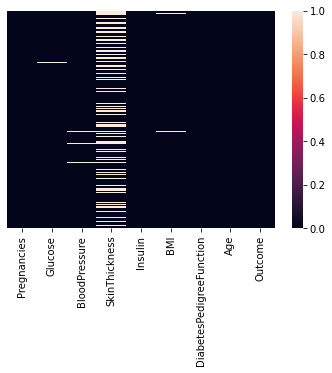

In [18]:
sns.heatmap(df.isnull(), yticklabels= False)

## Imputation of missing values

In [19]:
df_pima = df
df_pima.shape

(768, 9)

In [20]:
df_pima.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
mice = IterativeImputer(estimator= RandomForestRegressor(), random_state= 0)

In [22]:
df_pima[["Pregnancies", "Insulin", "SkinThickness", "Glucose", "BloodPressure", "BMI"]] = mice.fit_transform(df_pima[["Pregnancies", "Insulin","SkinThickness", "Glucose", "BloodPressure", "BMI"]])

In [23]:
df_pima

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0          35.00      0.0  33.6   
1            1.0     85.0           66.0          29.00      0.0  26.6   
2            8.0    183.0           64.0          20.40      0.0  23.3   
3            1.0     89.0           66.0          23.00     94.0  28.1   
4            0.0    137.0           40.0          35.00    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0          48.00    180.0  32.9   
764          2.0    122.0           70.0          27.00      0.0  36.8   
765          5.0    121.0           72.0          23.00    112.0  26.2   
766          1.0    126.0           60.0          25.56      0.0  30.1   
767          1.0     93.0           70.0          31.00      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [24]:
df_pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

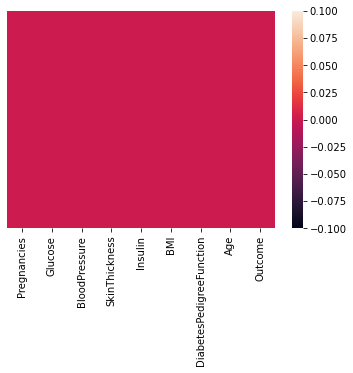

In [25]:
sns.heatmap(df_pima.isnull(), yticklabels= False)

#### Visualizing the binary class

<AxesSubplot:xlabel='Outcome', ylabel='count'>

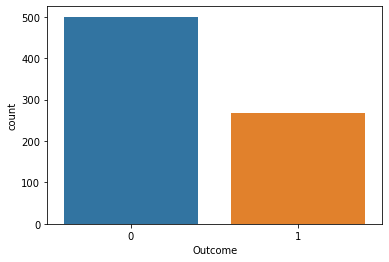

In [26]:
sns.countplot(x = 'Outcome', data = df_pima)

In [27]:
(df_pima['Outcome']==1).sum()*100 / df_pima.shape[0]

34.895833333333336

We can see the class is not uniformy distributed. Hence, this has to taken care during modeling.

<AxesSubplot:xlabel='Age'>

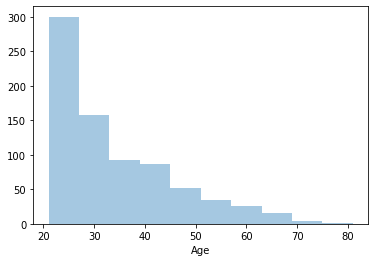

In [28]:
sns.distplot(df_pima['Age'],kde=False,bins=10)

<AxesSubplot:xlabel='Pregnancies'>

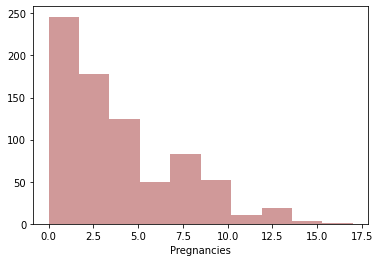

In [29]:
sns.distplot(df_pima['Pregnancies'].dropna(),kde=False,bins=10, color = 'darkred')

<AxesSubplot:xlabel='BMI'>

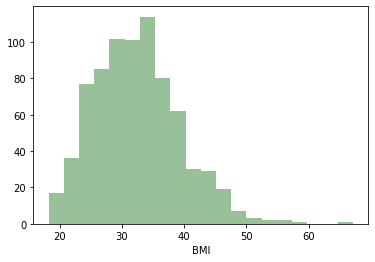

In [30]:
sns.distplot(df_pima['BMI'].dropna(),kde=False,bins=20, color= 'darkgreen')

<AxesSubplot:xlabel='Glucose'>

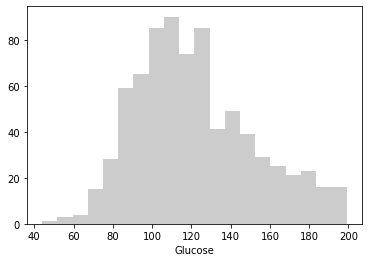

In [31]:
sns.distplot(df_pima['Glucose'].dropna() ,kde=False,bins=20, color= 'grey')

In [32]:
df_pima.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.626250      72.444557      28.817721   79.799479   
std       3.369578   30.455004      12.188608       9.620777  115.244002   
min       0.000000   44.000000      24.000000       7.000000    0.000000   
25%       1.000000   99.750000      64.000000      22.000000    0.000000   
50%       3.000000  117.000000      72.000000      28.670000   30.500000   
75%       6.000000  140.250000      80.000000      35.087500  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.418387                  0.471876   33.240885    0.348958  
std      6.898143                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Visualizing & Treating outliers

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

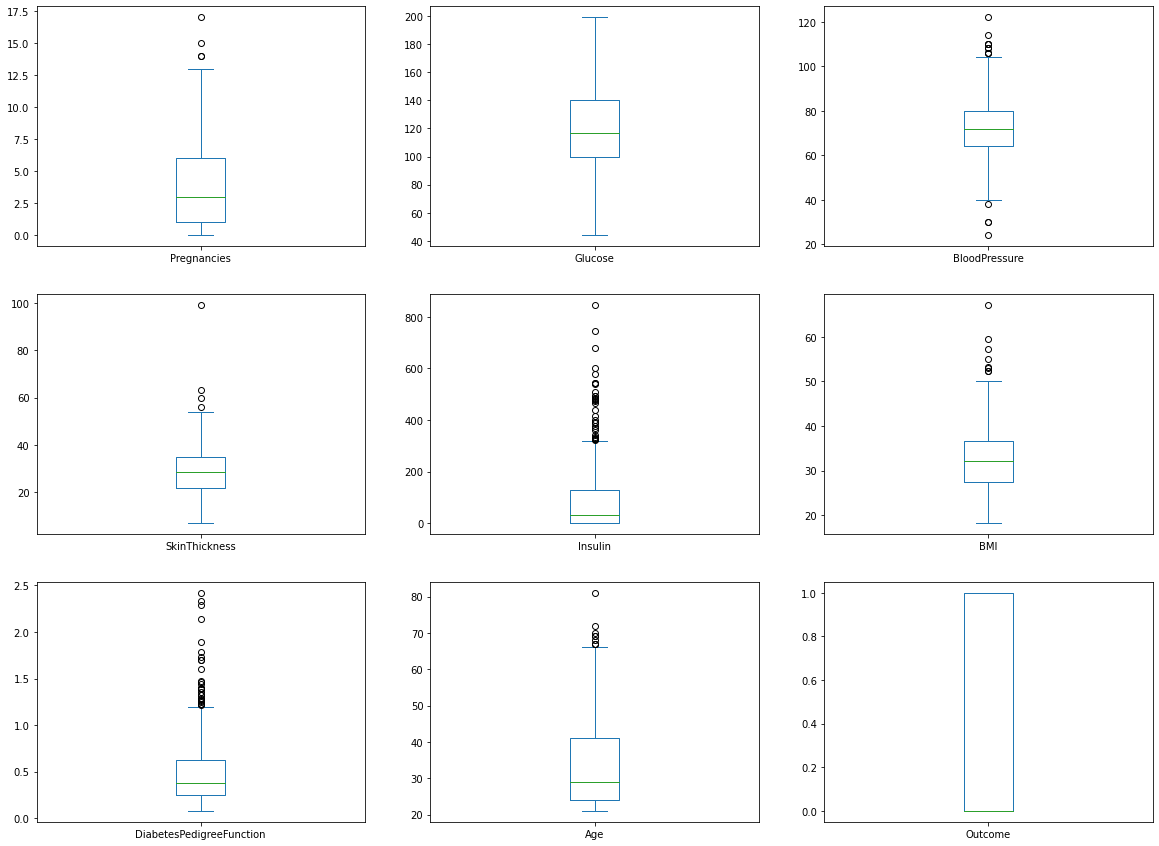

In [33]:
#Box and Whisker plot to visualize the distribution of all atributes
df_pima.plot(kind= 'box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [34]:
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

In [35]:
# model specification
model1 = LocalOutlierFactor(n_neighbors=10)
# model fitting
y_pred = model1.fit_predict(df_pima)
# filter outlier index
not_outlier_index = np.where(y_pred == 1)
outlier_index = np.where(y_pred == -1)# negative values are outliers and positives inliers
# filter outlier values
df_pima_1 = df_pima.iloc[not_outlier_index]

In [36]:
df_pima

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0          35.00      0.0  33.6   
1            1.0     85.0           66.0          29.00      0.0  26.6   
2            8.0    183.0           64.0          20.40      0.0  23.3   
3            1.0     89.0           66.0          23.00     94.0  28.1   
4            0.0    137.0           40.0          35.00    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0          48.00    180.0  32.9   
764          2.0    122.0           70.0          27.00      0.0  36.8   
765          5.0    121.0           72.0          23.00    112.0  26.2   
766          1.0    126.0           60.0          25.56      0.0  30.1   
767          1.0     93.0           70.0          31.00      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [37]:
df_pima_1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0          35.00      0.0  33.6   
1            1.0     85.0           66.0          29.00      0.0  26.6   
2            8.0    183.0           64.0          20.40      0.0  23.3   
3            1.0     89.0           66.0          23.00     94.0  28.1   
4            0.0    137.0           40.0          35.00    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0          48.00    180.0  32.9   
764          2.0    122.0           70.0          27.00      0.0  36.8   
765          5.0    121.0           72.0          23.00    112.0  26.2   
766          1.0    126.0           60.0          25.56      0.0  30.1   
767          1.0     93.0           70.0          31.00      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[745 rows x 9 columns]

In [38]:
df_pima_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               745 non-null    float64
 1   Glucose                   745 non-null    float64
 2   BloodPressure             745 non-null    float64
 3   SkinThickness             745 non-null    float64
 4   Insulin                   745 non-null    float64
 5   BMI                       745 non-null    float64
 6   DiabetesPedigreeFunction  745 non-null    float64
 7   Age                       745 non-null    int64  
 8   Outcome                   745 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 58.2 KB


### Making copies of the dataset

In [40]:
df_pima_l = df_pima_1

In [41]:
df_pima_lr = df_pima_1

In [42]:
df_pima_xgb = df_pima_1

In [43]:
df_pima_q = df_pima_1

In [44]:
df_pima_k = df_pima_1

### Spliting the dataset into Train and Test

In [45]:
X = df_pima_1.drop(["Outcome"], axis = 1)
y = df_pima_1.Outcome

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=10, test_size= 0.3, stratify= y)

### K - Nearest Neighbour

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    test_scores.append(knn.score(X_test,y_test))

In [50]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.01785714285714 % and k = [8, 15, 22, 23]


In [55]:
knn = KNeighborsClassifier(8)

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [57]:
knn_pred = knn.predict(X_test)

In [58]:
score = metrics.accuracy_score(y_test, knn_pred)
score

0.7901785714285714

In [59]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       145
           1       0.78      0.57      0.66        79

    accuracy                           0.79       224
   macro avg       0.79      0.74      0.75       224
weighted avg       0.79      0.79      0.78       224



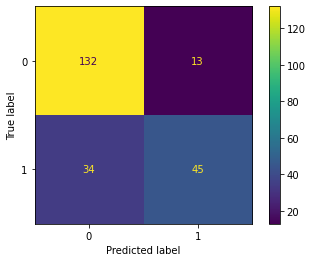

In [60]:
cm = confusion_matrix(y_test, knn_pred, labels= knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)
disp.plot()
plt.show()

#### Feature importance for KNN

Feature: 0, Score: 0.02303
Feature: 1, Score: 0.11094
Feature: 2, Score: 0.02265
Feature: 3, Score: 0.02188
Feature: 4, Score: 0.01766
Feature: 5, Score: 0.02879
Feature: 6, Score: -0.00038
Feature: 7, Score: 0.01766


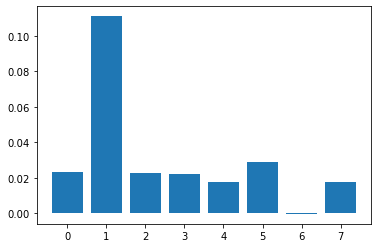

In [61]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [62]:
df_pima_k.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [63]:
X_k = df_pima_k.drop(["Outcome", "DiabetesPedigreeFunction"], axis = 1)
y_k = df_pima_k.Outcome

In [64]:
scaler = StandardScaler()
X_scaled_k = scaler.fit_transform(X_k)

In [65]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_scaled_k, y_k, random_state=10, test_size= 0.3, stratify= y_k)

In [66]:
test_scores = []
train_scores = []

for i in range(1,30):

    knn_k = KNeighborsClassifier(i)
    knn_k.fit(X_train_k,y_train_k)
    test_scores.append(knn_k.score(X_test_k,y_test_k))

In [67]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.67857142857143 % and k = [21, 25]


In [68]:
knn_k = KNeighborsClassifier(21)

In [69]:
knn_k.fit(X_train_k,y_train_k)

KNeighborsClassifier(n_neighbors=21)

In [70]:
knn_pred = knn_k.predict(X_test_k)

In [71]:
score = metrics.accuracy_score(y_test_k, knn_pred)
score

0.7767857142857143

In [72]:
print(classification_report(y_test_k, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       145
           1       0.75      0.56      0.64        79

    accuracy                           0.78       224
   macro avg       0.77      0.73      0.74       224
weighted avg       0.77      0.78      0.77       224



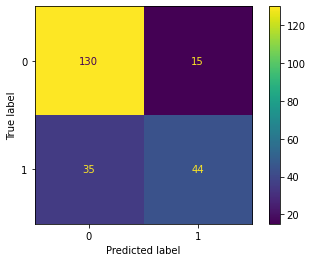

In [73]:
cm = confusion_matrix(y_test_k, knn_pred, labels= knn_k.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)
disp.plot()
plt.show()

### Linear Discriminent Analysis

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
lda = LinearDiscriminantAnalysis()

In [76]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [77]:
lda_pred = lda.predict(X_test)

In [78]:
score = metrics.accuracy_score(y_test, lda_pred)
score

0.78125

In [79]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       145
           1       0.74      0.58      0.65        79

    accuracy                           0.78       224
   macro avg       0.77      0.74      0.75       224
weighted avg       0.78      0.78      0.77       224



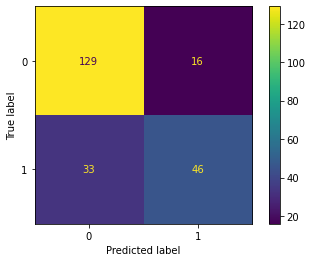

In [80]:
cm = confusion_matrix(y_test, lda_pred, labels= lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.00729
Feature: 1, Score: 0.12131
Feature: 2, Score: 0.00384
Feature: 3, Score: 0.00192
Feature: 4, Score: -0.00115
Feature: 5, Score: 0.00537
Feature: 6, Score: 0.00038
Feature: 7, Score: 0.00038


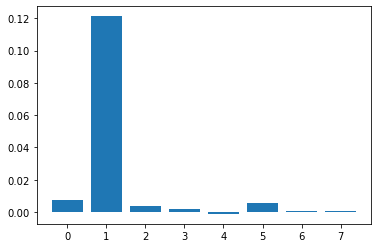

In [81]:
# perform permutation importance
results = permutation_importance(lda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [82]:
df_pima_l.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [83]:
X_l = df_pima_l.drop(["Outcome", "Insulin"], axis = 1)
y_l = df_pima_l.Outcome

In [84]:
scaler = StandardScaler()
X_scaled_l = scaler.fit_transform(X_l)

In [85]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_scaled_l, y_l, random_state=10, test_size= 0.3, stratify= y_l)

In [86]:
lda_1 = LinearDiscriminantAnalysis()

In [87]:
lda_1.fit(X_train_l, y_train_l)

LinearDiscriminantAnalysis()

In [88]:
lda_pred = lda_1.predict(X_test_l)

In [89]:
score = metrics.accuracy_score(y_test_l, lda_pred)
score

0.7857142857142857

In [90]:
print(classification_report(y_test_l, lda_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       145
           1       0.75      0.59      0.66        79

    accuracy                           0.79       224
   macro avg       0.77      0.74      0.75       224
weighted avg       0.78      0.79      0.78       224



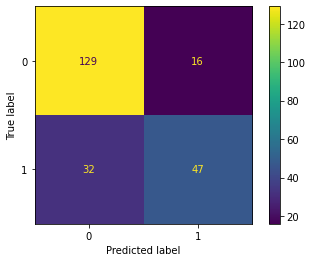

In [91]:
cm = confusion_matrix(y_test_l, lda_pred, labels= lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lda.classes_)
disp.plot()
plt.show()

### Quadratic Discriminent Analysis

In [92]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [93]:
qda = QuadraticDiscriminantAnalysis(priors=np.array([0.47,0.53]))

In [94]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=array([0.47, 0.53]))

In [95]:
qda_pred = qda.predict(X_test)

In [96]:
score = metrics.accuracy_score(y_test, qda_pred)
score

0.7544642857142857

In [97]:
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       145
           1       0.63      0.73      0.68        79

    accuracy                           0.75       224
   macro avg       0.74      0.75      0.74       224
weighted avg       0.77      0.75      0.76       224



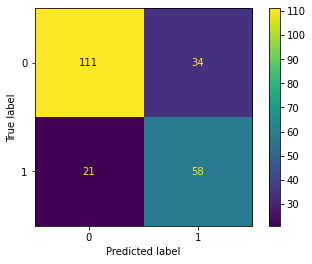

In [98]:
cm = confusion_matrix(y_test, qda_pred, labels= qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= qda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.05221
Feature: 1, Score: 0.10902
Feature: 2, Score: 0.00269
Feature: 3, Score: 0.01305
Feature: 4, Score: 0.02534
Feature: 5, Score: 0.03263
Feature: 6, Score: 0.01651
Feature: 7, Score: 0.04530


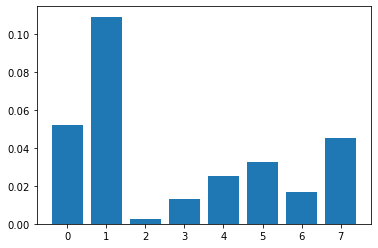

In [99]:
# perform permutation importance
results = permutation_importance(qda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [100]:
df_pima_q.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [108]:
X_q = df_pima_q.drop(["Outcome","BloodPressure"], axis = 1)
y_q = df_pima_q.Outcome

In [109]:
scaler = StandardScaler()
X_scaled_q = scaler.fit_transform(X_q)

In [110]:
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_scaled_q, y_q, random_state=10, test_size= 0.3, stratify= y_q)

In [111]:
qda_1 = QuadraticDiscriminantAnalysis(priors=np.array([0.47,0.53]))

In [112]:
qda_1.fit(X_train_q, y_train_q)

QuadraticDiscriminantAnalysis(priors=array([0.47, 0.53]))

In [113]:
qda_pred = qda_1.predict(X_test_q)

In [114]:
score = metrics.accuracy_score(y_test_q, qda_pred)
score

0.75

In [115]:
print(classification_report(y_test_q, qda_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       145
           1       0.63      0.71      0.67        79

    accuracy                           0.75       224
   macro avg       0.73      0.74      0.73       224
weighted avg       0.76      0.75      0.75       224



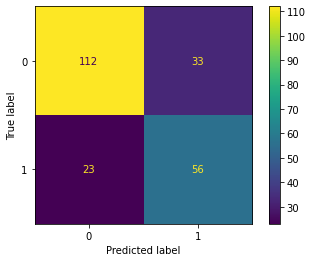

In [116]:
cm = confusion_matrix(y_test_q, qda_pred, labels= qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= qda.classes_)
disp.plot()
plt.show()

### Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
lr = LogisticRegression(C= 2, class_weight= 0)

In [119]:
lr.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=0)

In [120]:
lr_pred = lr.predict(X_test)

In [121]:
metrics.accuracy_score(y_test,lr_pred)

0.7857142857142857

In [122]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       145
           1       0.75      0.58      0.66        79

    accuracy                           0.79       224
   macro avg       0.78      0.74      0.75       224
weighted avg       0.78      0.79      0.78       224



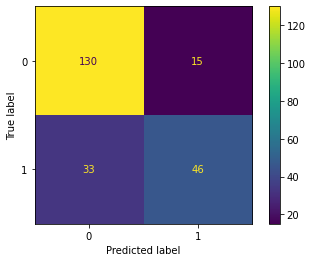

In [123]:
cm = confusion_matrix(y_test, lr_pred, labels= lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.36164
Feature: 1, Score: 1.09594
Feature: 2, Score: 0.09912
Feature: 3, Score: 0.12194
Feature: 4, Score: -0.09451
Feature: 5, Score: 0.43523
Feature: 6, Score: 0.19295
Feature: 7, Score: 0.06967


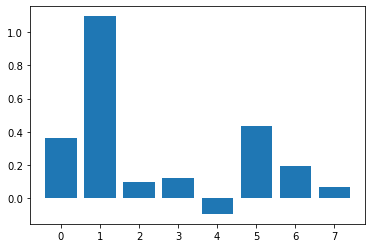

In [124]:
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Logistic Regression using Stats Model

In [125]:
import statsmodels.api as sm

In [126]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.534715
         Iterations 6


In [127]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  521
Model:                          Logit   Df Residuals:                      513
Method:                           MLE   Df Model:                            7
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.1751
Time:                        14:11:46   Log-Likelihood:                -278.59
converged:                       True   LL-Null:                       -337.72
Covariance Type:            nonrobust   LLR p-value:                 1.758e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3571      0.131      2.722      0.006       0.100       0.614
x2             1.0846      0.138      7.835      0.000       0.813       1.356
x3             0.1010      0.123      0.824      0.4

In [128]:
df_pima_lr.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [130]:
X_lr = df_pima_lr.drop(["Outcome","Insulin"], axis = 1)
y_lr = df_pima_lr.Outcome

In [131]:
scaler = StandardScaler()
X_scaled_lr = scaler.fit_transform(X_lr)

In [132]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled_lr, y_lr, random_state=10, test_size= 0.3, stratify= y_lr)

In [133]:
lr_1 = LogisticRegression(C= 2, class_weight= 0)

In [134]:
lr_1.fit(X_train_lr, y_train_lr)

LogisticRegression(C=2, class_weight=0)

In [135]:
lr_pred = lr_1.predict(X_test_lr)

In [136]:
metrics.accuracy_score(y_test_lr,lr_pred)

0.78125

In [137]:
print(classification_report(y_test_lr, lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       145
           1       0.73      0.59      0.66        79

    accuracy                           0.78       224
   macro avg       0.77      0.74      0.75       224
weighted avg       0.78      0.78      0.78       224



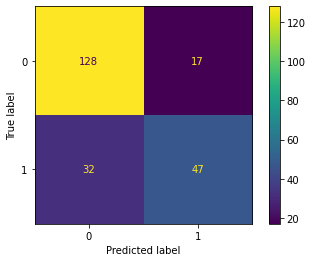

In [138]:
cm = confusion_matrix(y_test_lr, lr_pred, labels= lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot()
plt.show()

### XG- Boost

In [139]:
from xgboost import XGBClassifier

In [140]:
xgb = XGBClassifier(n_estimators=2000, max_depth=3, 
                    learning_rate=0.2, booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [141]:
pred_x = xgb.predict(X_test)

In [142]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7633928571428571

In [143]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       145
           1       0.69      0.61      0.64        79

    accuracy                           0.76       224
   macro avg       0.74      0.73      0.73       224
weighted avg       0.76      0.76      0.76       224



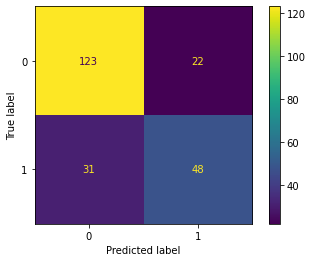

In [144]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

In [145]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [146]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'n_estimators': hp.quniform('n_estimator',1000, 5000, 500),
        'learning_rate': hp.uniform('learning_rate', 0.01, 5),
        'seed': 0
    }
        

In [147]:
def objective(space):
    clf= XGBClassifier(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate= int(space['learning_rate']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [148]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

SCORE:                                                                                                                 
0.6473214285714286                                                                                                     
SCORE:                                                                                                                 
0.71875                                                                                                                
SCORE:                                                                                                                 
0.6919642857142857                                                                                                     
SCORE:                                                                                                                 
0.7366071428571429                                                                                                     
SCORE:                                  

In [149]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9850128139596833, 'learning_rate': 1.7789178816323956, 'max_depth': 4.0, 'n_estimator': 2500.0}


In [150]:
xgb = XGBClassifier(n_estimators = 2500, colsample_bytree = 0.9850128139596833,learning_rate = 1.7789178816323956, 
                    max_depth = 4,
                    booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9850128139596833, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.7789178816323956,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [151]:
pred_x = xgb.predict(X_test)

In [152]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7455357142857143

In [153]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       145
           1       0.63      0.66      0.65        79

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.75      0.75      0.75       224



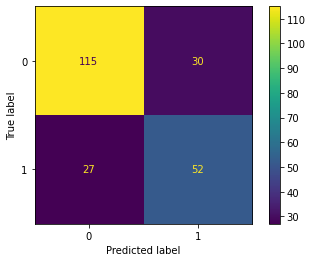

In [154]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.21793
Feature: 1, Score: 0.27059
Feature: 2, Score: 0.13557
Feature: 3, Score: 0.08432
Feature: 4, Score: 0.02115
Feature: 5, Score: 0.13210
Feature: 6, Score: 0.02707
Feature: 7, Score: 0.11128


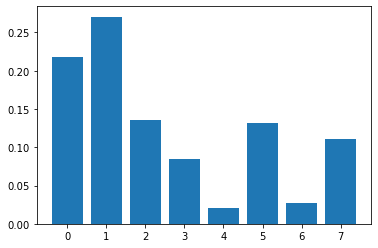

In [155]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### XG-Boost

In [175]:
df_pima_xgb.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [176]:
X_xgb = df_pima_xgb.drop(["Outcome","Insulin"], axis = 1)
y_xgb = df_pima_xgb.Outcome

In [177]:
scaler = StandardScaler()
X_scaled_xgb = scaler.fit_transform(X_xgb)

In [178]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_scaled_xgb, y_xgb, random_state=10, test_size= 0.3, stratify= y_xgb)

In [179]:
def objective(space):
    clf= XGBClassifier(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate= int(space['learning_rate']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_xgb, y_train_xgb), ( X_test_xgb, y_test_xgb)]
    
    clf.fit(X_train_xgb, y_train_xgb,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test_xgb)
    accuracy = accuracy_score(y_test_xgb, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [180]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

SCORE:                                                                                                                 
0.6607142857142857                                                                                                     
SCORE:                                                                                                                 
0.7544642857142857                                                                                                     
SCORE:                                                                                                                 
0.6339285714285714                                                                                                     
SCORE:                                                                                                                 
0.6473214285714286                                                                                                     
SCORE:                                  

In [181]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5041150538841064, 'learning_rate': 2.1766229709014135, 'max_depth': 3.0, 'n_estimator': 3000.0}


In [182]:
xgb_1 = XGBClassifier(n_estimators = 3000, colsample_bytree = 0.5041150538841064,learning_rate = 2.1766229709014135, 
                    max_depth = 3,
                    booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb_1.fit(X= X_train_xgb, y= y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.5041150538841064, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=2.1766229709014135,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=3000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [183]:
xgb_pred = xgb_1.predict(X_test_xgb)

In [184]:
metrics.accuracy_score(y_test_xgb,xgb_pred)

0.6696428571428571

In [185]:
print(classification_report(y_test_xgb, xgb_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       145
           1       0.53      0.52      0.53        79

    accuracy                           0.67       224
   macro avg       0.64      0.64      0.64       224
weighted avg       0.67      0.67      0.67       224



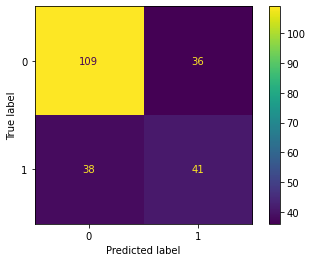

In [186]:
cms = confusion_matrix(y_test_xgb, xgb_pred, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

### AUC-AOC Curve

In [187]:
# predict probabilities
pred_prob1 = knn.predict_proba(X_test)
pred_prob2 = lda.predict_proba(X_test)
pred_prob3 = qda.predict_proba(X_test)
pred_prob4 = lr.predict_proba(X_test)
pred_prob5 = xgb.predict_proba(X_test)

In [188]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [189]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5)

0.8611959842863378 0.8145351374945439 0.8608467917939764 0.83212570929725 0.8611959842863378


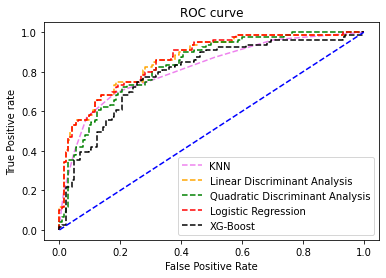

In [190]:
# matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='violet', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Linear Discriminant Analysis')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Quadratic Discriminant Analysis')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='XG-Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### Managing imbalance in the Dataset by SMOTE

In [191]:
# pip install imblearn (if you don't have imblearn in your system)
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X_train, y_train.ravel())

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=10, test_size= 0.3)

### K - Nearest Neighbour after SMOTE

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    test_scores.append(knn.score(X_test,y_test))

In [195]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 83.2512315270936 % and k = [12]


In [230]:
knn = KNeighborsClassifier(12)

In [231]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [232]:
knn_pred = knn.predict(X_test)

In [233]:
score = metrics.accuracy_score(y_test, knn_pred)
score

0.8325123152709359

In [234]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       105
           1       0.79      0.89      0.84        98

    accuracy                           0.83       203
   macro avg       0.84      0.83      0.83       203
weighted avg       0.84      0.83      0.83       203



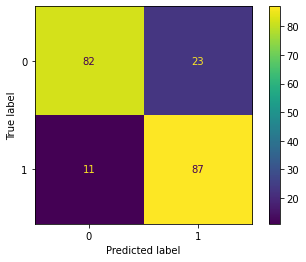

In [235]:
cm = confusion_matrix(y_test, knn_pred, labels= knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)
disp.plot()
plt.show()

#### Feature importance for KNN

Feature: 0, Score: 0.05285
Feature: 1, Score: 0.12347
Feature: 2, Score: 0.03679
Feature: 3, Score: 0.04186
Feature: 4, Score: 0.02622
Feature: 5, Score: 0.03975
Feature: 6, Score: 0.04609
Feature: 7, Score: 0.04989


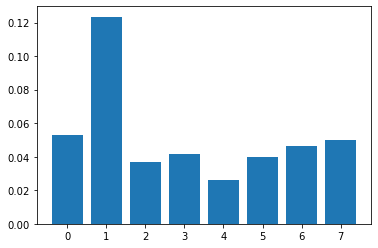

In [202]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Linear Discriminent Analysis after SMOTE

In [203]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [204]:
lda = LinearDiscriminantAnalysis()

In [205]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [206]:
lda_pred = lda.predict(X_test)

In [207]:
score = metrics.accuracy_score(y_test, lda_pred)
score

0.7438423645320197

In [208]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       105
           1       0.73      0.73      0.73        98

    accuracy                           0.74       203
   macro avg       0.74      0.74      0.74       203
weighted avg       0.74      0.74      0.74       203



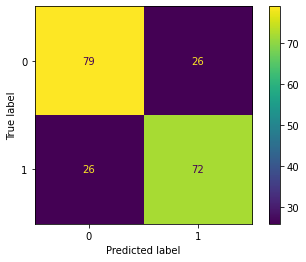

In [209]:
cm = confusion_matrix(y_test, lda_pred, labels= lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.00592
Feature: 1, Score: 0.15053
Feature: 2, Score: -0.00423
Feature: 3, Score: 0.01353
Feature: 4, Score: -0.00296
Feature: 5, Score: 0.00803
Feature: 6, Score: 0.00846
Feature: 7, Score: 0.00127


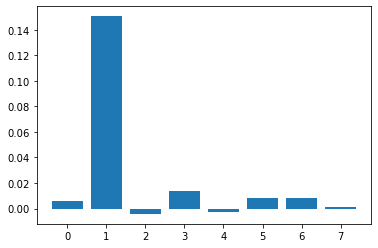

In [210]:
# perform permutation importance
results = permutation_importance(lda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Quadratic Discriminent Analysis after SMOTE

In [211]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [212]:
qda = QuadraticDiscriminantAnalysis(priors=np.array([0.47,0.53]))

In [213]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=array([0.47, 0.53]))

In [214]:
qda_pred = qda.predict(X_test)

In [215]:
score = metrics.accuracy_score(y_test, qda_pred)
score

0.7142857142857143

In [216]:
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       105
           1       0.74      0.63      0.68        98

    accuracy                           0.71       203
   macro avg       0.72      0.71      0.71       203
weighted avg       0.72      0.71      0.71       203



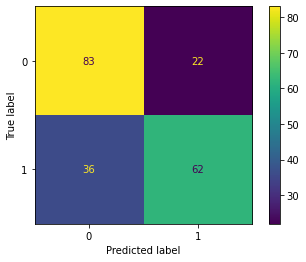

In [217]:
cm = confusion_matrix(y_test, qda_pred, labels= qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= qda.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.02537
Feature: 1, Score: 0.10063
Feature: 2, Score: 0.00761
Feature: 3, Score: 0.02030
Feature: 4, Score: 0.01734
Feature: 5, Score: 0.01480
Feature: 6, Score: 0.01776
Feature: 7, Score: 0.01268


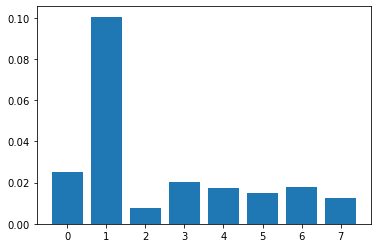

In [218]:
# perform permutation importance
results = permutation_importance(qda, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Logistic Regression after SMOTE

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
lr = LogisticRegression(C= 2, class_weight= 0)

In [221]:
lr.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=0)

In [222]:
lr_pred = lr.predict(X_test)

In [223]:
metrics.accuracy_score(y_test,lr_pred)

0.7536945812807881

In [224]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       105
           1       0.74      0.76      0.75        98

    accuracy                           0.75       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.75      0.75      0.75       203



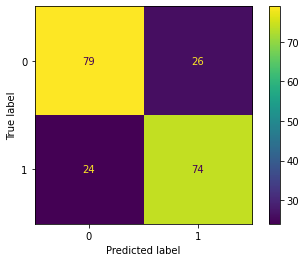

In [225]:
cm = confusion_matrix(y_test, lr_pred, labels= lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= lr.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.33307
Feature: 1, Score: 1.18402
Feature: 2, Score: 0.16536
Feature: 3, Score: 0.25228
Feature: 4, Score: -0.11123
Feature: 5, Score: 0.34637
Feature: 6, Score: 0.24446
Feature: 7, Score: 0.01812


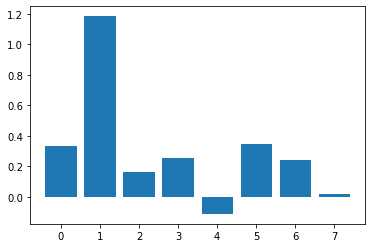

In [226]:
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Logistic Regression using Stats Model

In [227]:
import statsmodels.api as sm

In [228]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.502884
         Iterations 6


In [229]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  473
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                            7
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.2744
Time:                        14:27:38   Log-Likelihood:                -237.86
converged:                       True   LL-Null:                       -327.81
Covariance Type:            nonrobust   LLR p-value:                 2.060e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3366      0.147      2.294      0.022       0.049       0.624
x2             1.1891      0.153      7.780      0.000       0.890       1.489
x3             0.1518      0.136      1.113      0.2

### XG- Boost after SMOTE

In [236]:
from xgboost import XGBClassifier

In [237]:
xgb = XGBClassifier(n_estimators=2000, max_depth=3, 
                    learning_rate=0.2, booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [238]:
pred_x = xgb.predict(X_test)

In [239]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7635467980295566

In [240]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       105
           1       0.75      0.78      0.76        98

    accuracy                           0.76       203
   macro avg       0.76      0.76      0.76       203
weighted avg       0.76      0.76      0.76       203



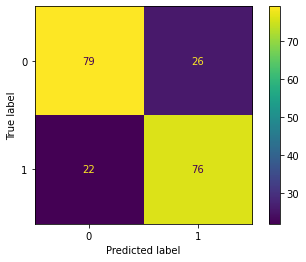

In [241]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

In [242]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [243]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'n_estimators': hp.quniform('n_estimator',1000, 5000, 500),
        'learning_rate': hp.uniform('learning_rate', 0.01, 5),
        'seed': 0
    }
        

In [244]:
def objective(space):
    clf= XGBClassifier(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate= int(space['learning_rate']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [245]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

SCORE:                                                                                                                 
0.7044334975369458                                                                                                     
SCORE:                                                                                                                 
0.6748768472906403                                                                                                     
SCORE:                                                                                                                 
0.6847290640394089                                                                                                     
SCORE:                                                                                                                 
0.6157635467980296                                                                                                     
SCORE:                                  

In [246]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5230180810650478, 'learning_rate': 1.9701301421505377, 'max_depth': 3.0, 'n_estimator': 1000.0}


In [247]:
xgb = XGBClassifier(n_estimators = 1000, colsample_bytree = 0.5230180810650478,learning_rate = 1.8238919122173243, 
                    max_depth = 5,
                    booster='gbtree', 
                    n_jobs=-1, gpu_id=-1)
xgb.fit(X= X_train, y= y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.5230180810650478, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.8238919122173243,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=5,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [248]:
pred_x = xgb.predict(X_test)

In [249]:
score_x = metrics.accuracy_score(y_test, pred_x)
score_x

0.7684729064039408

In [250]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       105
           1       0.73      0.82      0.77        98

    accuracy                           0.77       203
   macro avg       0.77      0.77      0.77       203
weighted avg       0.77      0.77      0.77       203



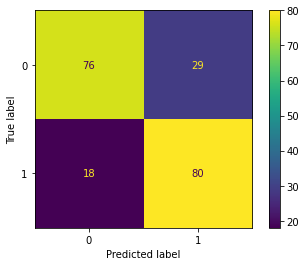

In [251]:
cms = confusion_matrix(y_test, pred_x, labels= xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= xgb.classes_)
disp.plot()
plt.show()

Feature: 0, Score: 0.14386
Feature: 1, Score: 0.28382
Feature: 2, Score: 0.08867
Feature: 3, Score: 0.18982
Feature: 4, Score: 0.08441
Feature: 5, Score: 0.11759
Feature: 6, Score: 0.03399
Feature: 7, Score: 0.05784


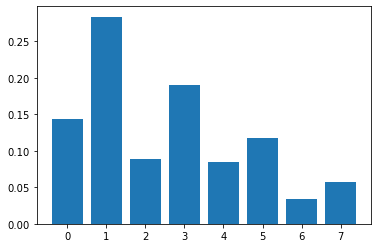

In [252]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### AUC-AOC Curve after SMOTE

In [253]:
# predict probabilities
pred_prob1 = knn.predict_proba(X_test)
pred_prob2 = lda.predict_proba(X_test)
pred_prob3 = qda.predict_proba(X_test)
pred_prob4 = lr.predict_proba(X_test)
pred_prob5 = xgb.predict_proba(X_test)

In [254]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [255]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5)

0.8457725947521866 0.8808551992225461 0.8439261418853256 0.8299319727891157 0.8457725947521866


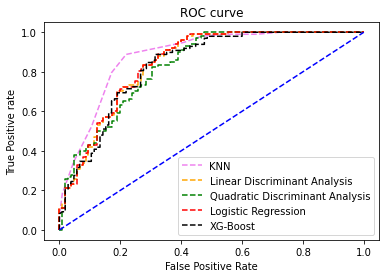

In [256]:
# matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='violet', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Linear Discriminant Analysis')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Quadratic Discriminant Analysis')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='XG-Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## Conclusion

### Without smote the best model is KNN with an accuracy of *79%* and also the AUC-ROC score, after implementing SMOTE can see that KNN has the best accuracy at *83%* but the AUC-ROC score for LDA is the highest. I choose KNN over LDA as its errors which are False Positive(FP) & False Negative(FN) are low compared to LDA.
### Thus, it being a healthcare problem we should try to choose a model whose not only accuracy-wise good but also False Positive(FP) & False Negative(FN) are low and hence KNN is a better model according to me.